In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile

In [2]:
# import data directly from myria

fileURL = 'https://rest.myria.cs.washington.edu:1776/dataset/user-armbrustlab/program-seaflow/relation-div_abun_sizechl_sds/data?format=csv'
result = pd.read_csv(fileURL)
print(result.columns)

Index([u'abundance', u'size', u'N0', u'H', u'J', u'T', u'S', u'LON', u'LAT', u'day', u'Cruise', u'file'], dtype='object')


In [3]:
# plot the mean bead fsc_small value in space
# the data

# subset the data into big and small

big = result[(result['size']=='big')]
small = result[(result['size']=='small')]

value = 'H'
xb = (big['LON']).values # longitude
yb = (big['LAT']).values # latitude
zb = (big[value]).values # bead attribute

xs = (small['LON']).values # longitude
ys = (small['LAT']).values # latitude
zs = (small[value]).values # bead attribute

# convert all longitude to longitude east
xb[xb<0]= 360+xb[xb<0];
xs[xs<0]= 360+xs[xs<0];

xbew = xb
xsew = xs
xbew[xbew>180] = xbew[xbew>180]-360
xsew[xsew>180] = xsew[xsew>180]-360


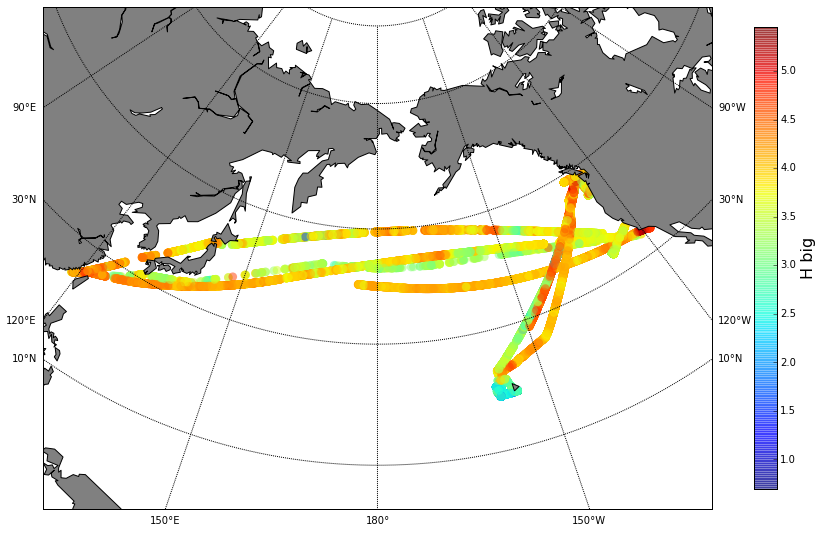

In [4]:
fig1 = plt.figure(1, figsize=(15,9))

m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=15.,lat_2=60,lat_0=45,lon_0=-180.)
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')
#plt.axes([0.025, 0.025, 0.95, 0.95])
xm, ym = m(xbew,yb)
m.scatter(xm, ym, s=75, c=zb, alpha=.5,lw=0)

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

cb = plt.colorbar(shrink=.92)
cb.set_label(label='H big' ,fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

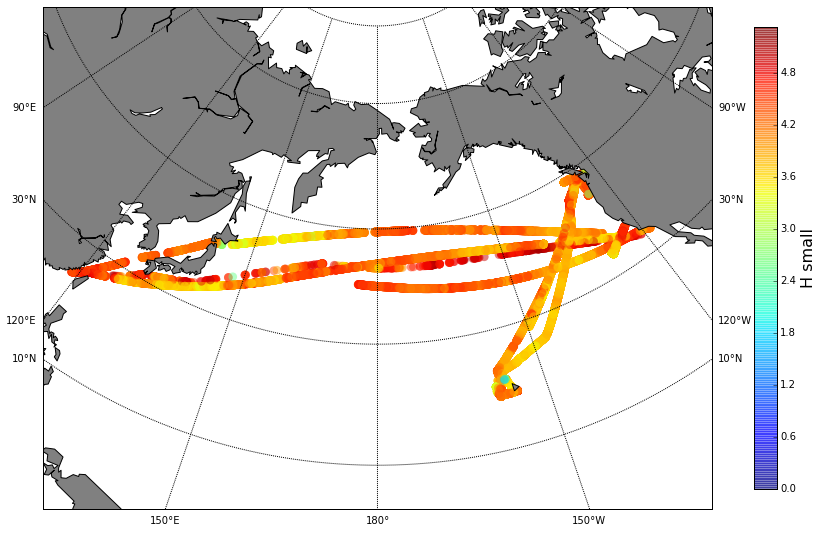

In [5]:
fig2 = plt.figure(2, figsize=(15,9))

m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=15.,lat_2=60,lat_0=45,lon_0=-180.)
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')
#plt.axes([0.025, 0.025, 0.95, 0.95])
xm, ym = m(xsew,ys)
m.scatter(xm, ym, s=75, c=zs, alpha=.5,lw=0)

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

cb = plt.colorbar(shrink=.92)
cb.set_label(label='H small',fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

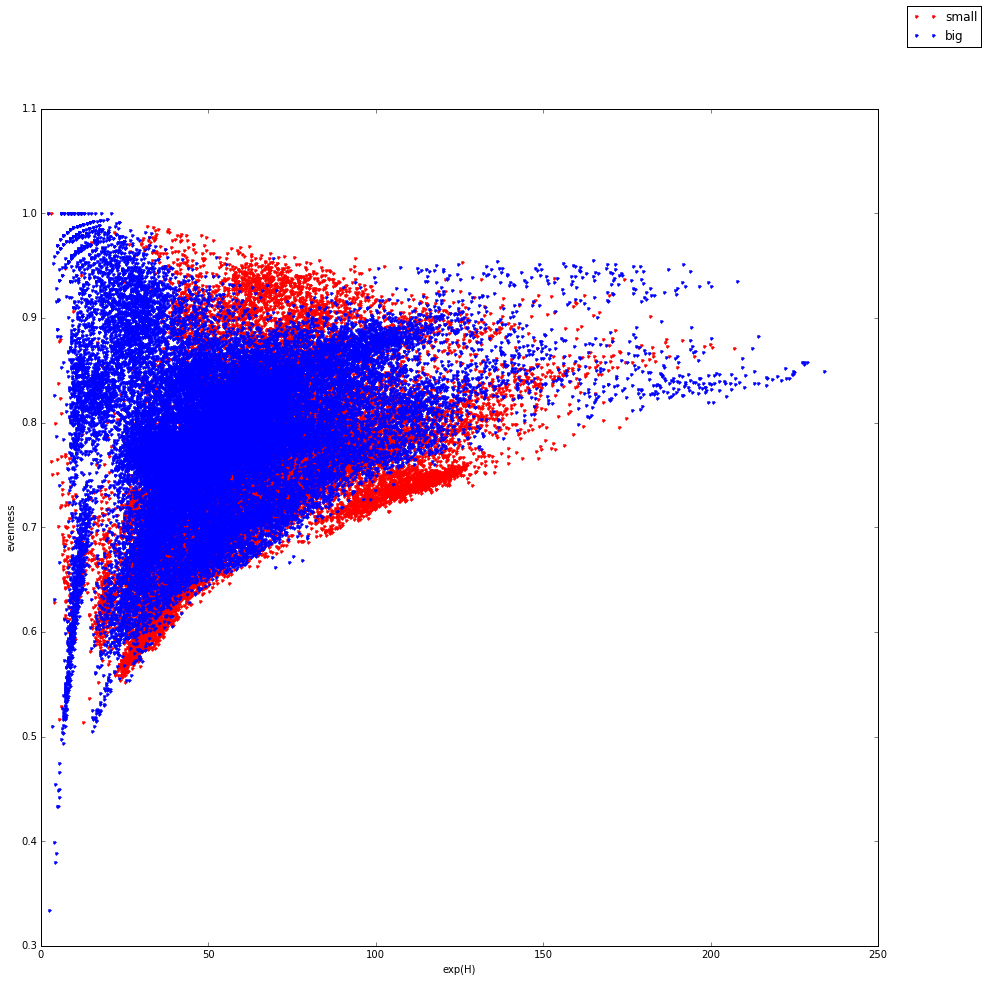

In [6]:
fig2 = plt.figure(2, figsize=(15,15))

#plt.plot((small['N0'].values),small['J'],'r.',alpha=.5)
#plt.plot((big['N0'].values),big['J'],'b.',alpha=.4)

l1, l2 = plt.plot(np.exp(small['H'].values),small['J'],'r.',np.exp(big['H'].values),big['J'],'b.')
plt.xlabel('exp(H)')
plt.ylabel('evenness')

fig2.legend((l1, l2), ('small', 'big'))

plt.show()

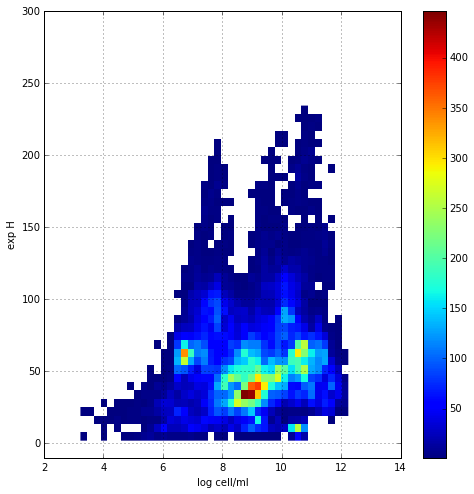

In [7]:
fig4 = plt.figure(4, figsize=(8,8))

plt.hist2d(np.log((big['abundance'].values)*10**3),np.exp(big['H']), bins=40, cmap='jet',cmin=1, cmax=500)
plt.colorbar()
plt.axis([2, 14,-10,300])
plt.grid(True)
plt.xlabel('log cell/ml')
plt.ylabel('exp H')
plt.show()

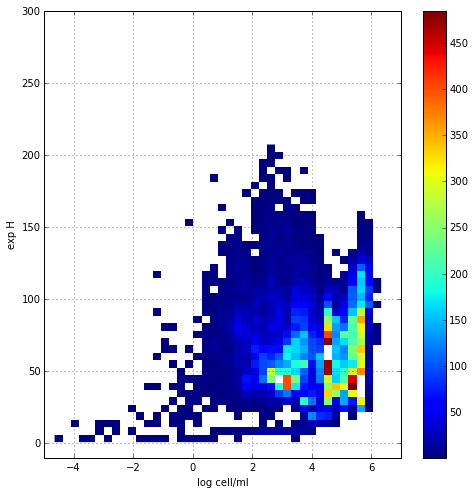

In [8]:
fig5 = plt.figure(5, figsize=(8,8))

plt.hist2d(np.log(small['abundance']),np.exp(small['H']), bins=40, cmap='jet',cmin=1, cmax=500)
plt.colorbar()
plt.axis([-5,7,-10,300])
plt.grid(True)
plt.xlabel('log cell/ml')
plt.ylabel('exp H')
plt.show()

In [32]:
d = (big['day']).tolist()

year = np.empty(len(d))
day = np.empty(len(d))

for i in range(len(d)):
    year[i], day[i] = (d[i].split('_'))


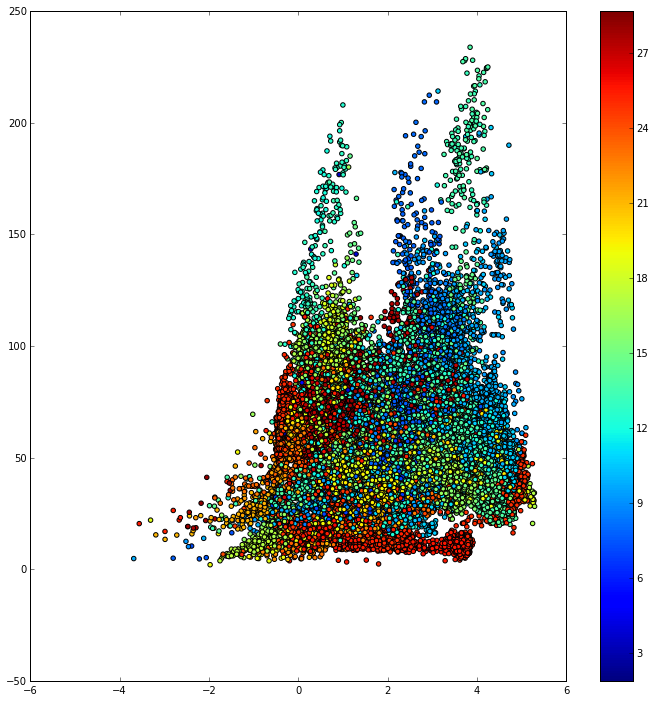

In [36]:
fig6 = plt.figure(6, figsize=(12,12)) 
plt.scatter(np.log(big['abundance']),np.exp(big['H']),c=big['T'])
plt.colorbar()
plt.show()

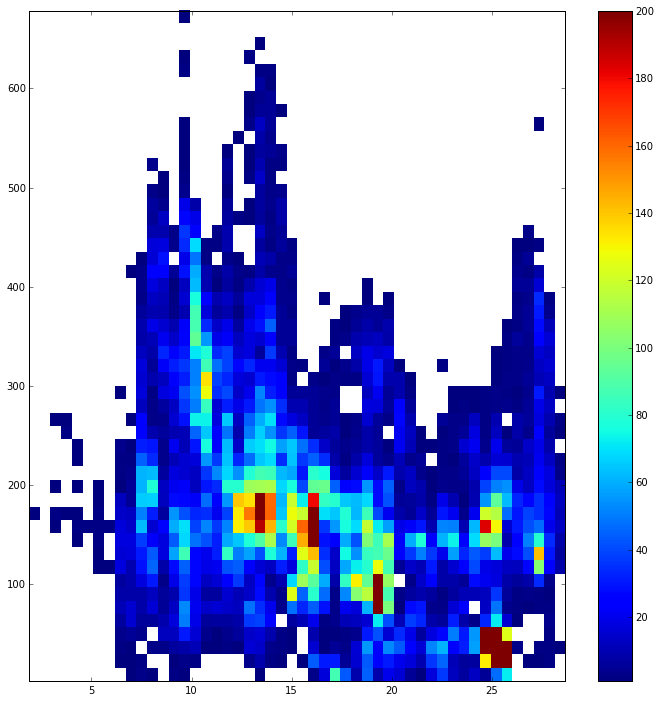

In [66]:
fig7 = plt.figure(7, figsize=(12,12)) 

plt.hist2d(big['T'],big['N0'], bins=50, cmap='jet',cmin=1, vmax=200)
plt.colorbar()
plt.show()